# Linear Regression 

In [2]:
## Read data
import os
import pandas as pd
nb_full_path = os.path.join(os.getcwd(), 'Day-9.ipynb')
df=pd.read_csv(os.path.join(os.path.dirname(nb_full_path) + '/data/day.csv'), sep=',',header=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


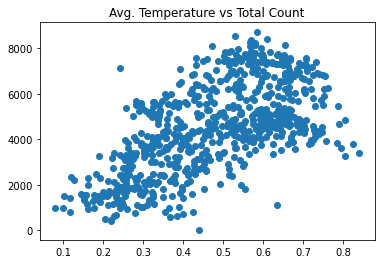

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['atemp'], df['cnt'])
plt.title("Avg. Temperature vs Total Count")
plt.show()

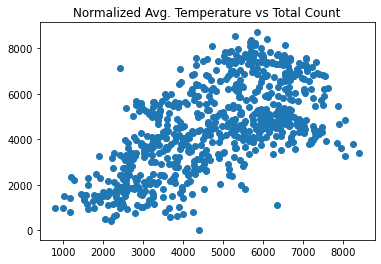

In [4]:
df['atemp'] = df['atemp'].apply(lambda x: x * 10000)
import matplotlib.pyplot as plt
plt.scatter(df['atemp'], df['cnt'])
plt.title("Normalized Avg. Temperature vs Total Count")
plt.show()

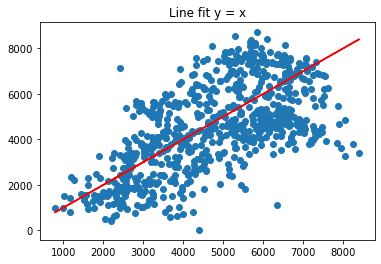

In [5]:
#y = x
import matplotlib.pyplot as plt
y_fit = df['atemp']
plt.plot(df['atemp'], y_fit, color = 'r')
plt.scatter(df['atemp'], df['cnt'])
plt.title("Line fit y = x")
plt.show()


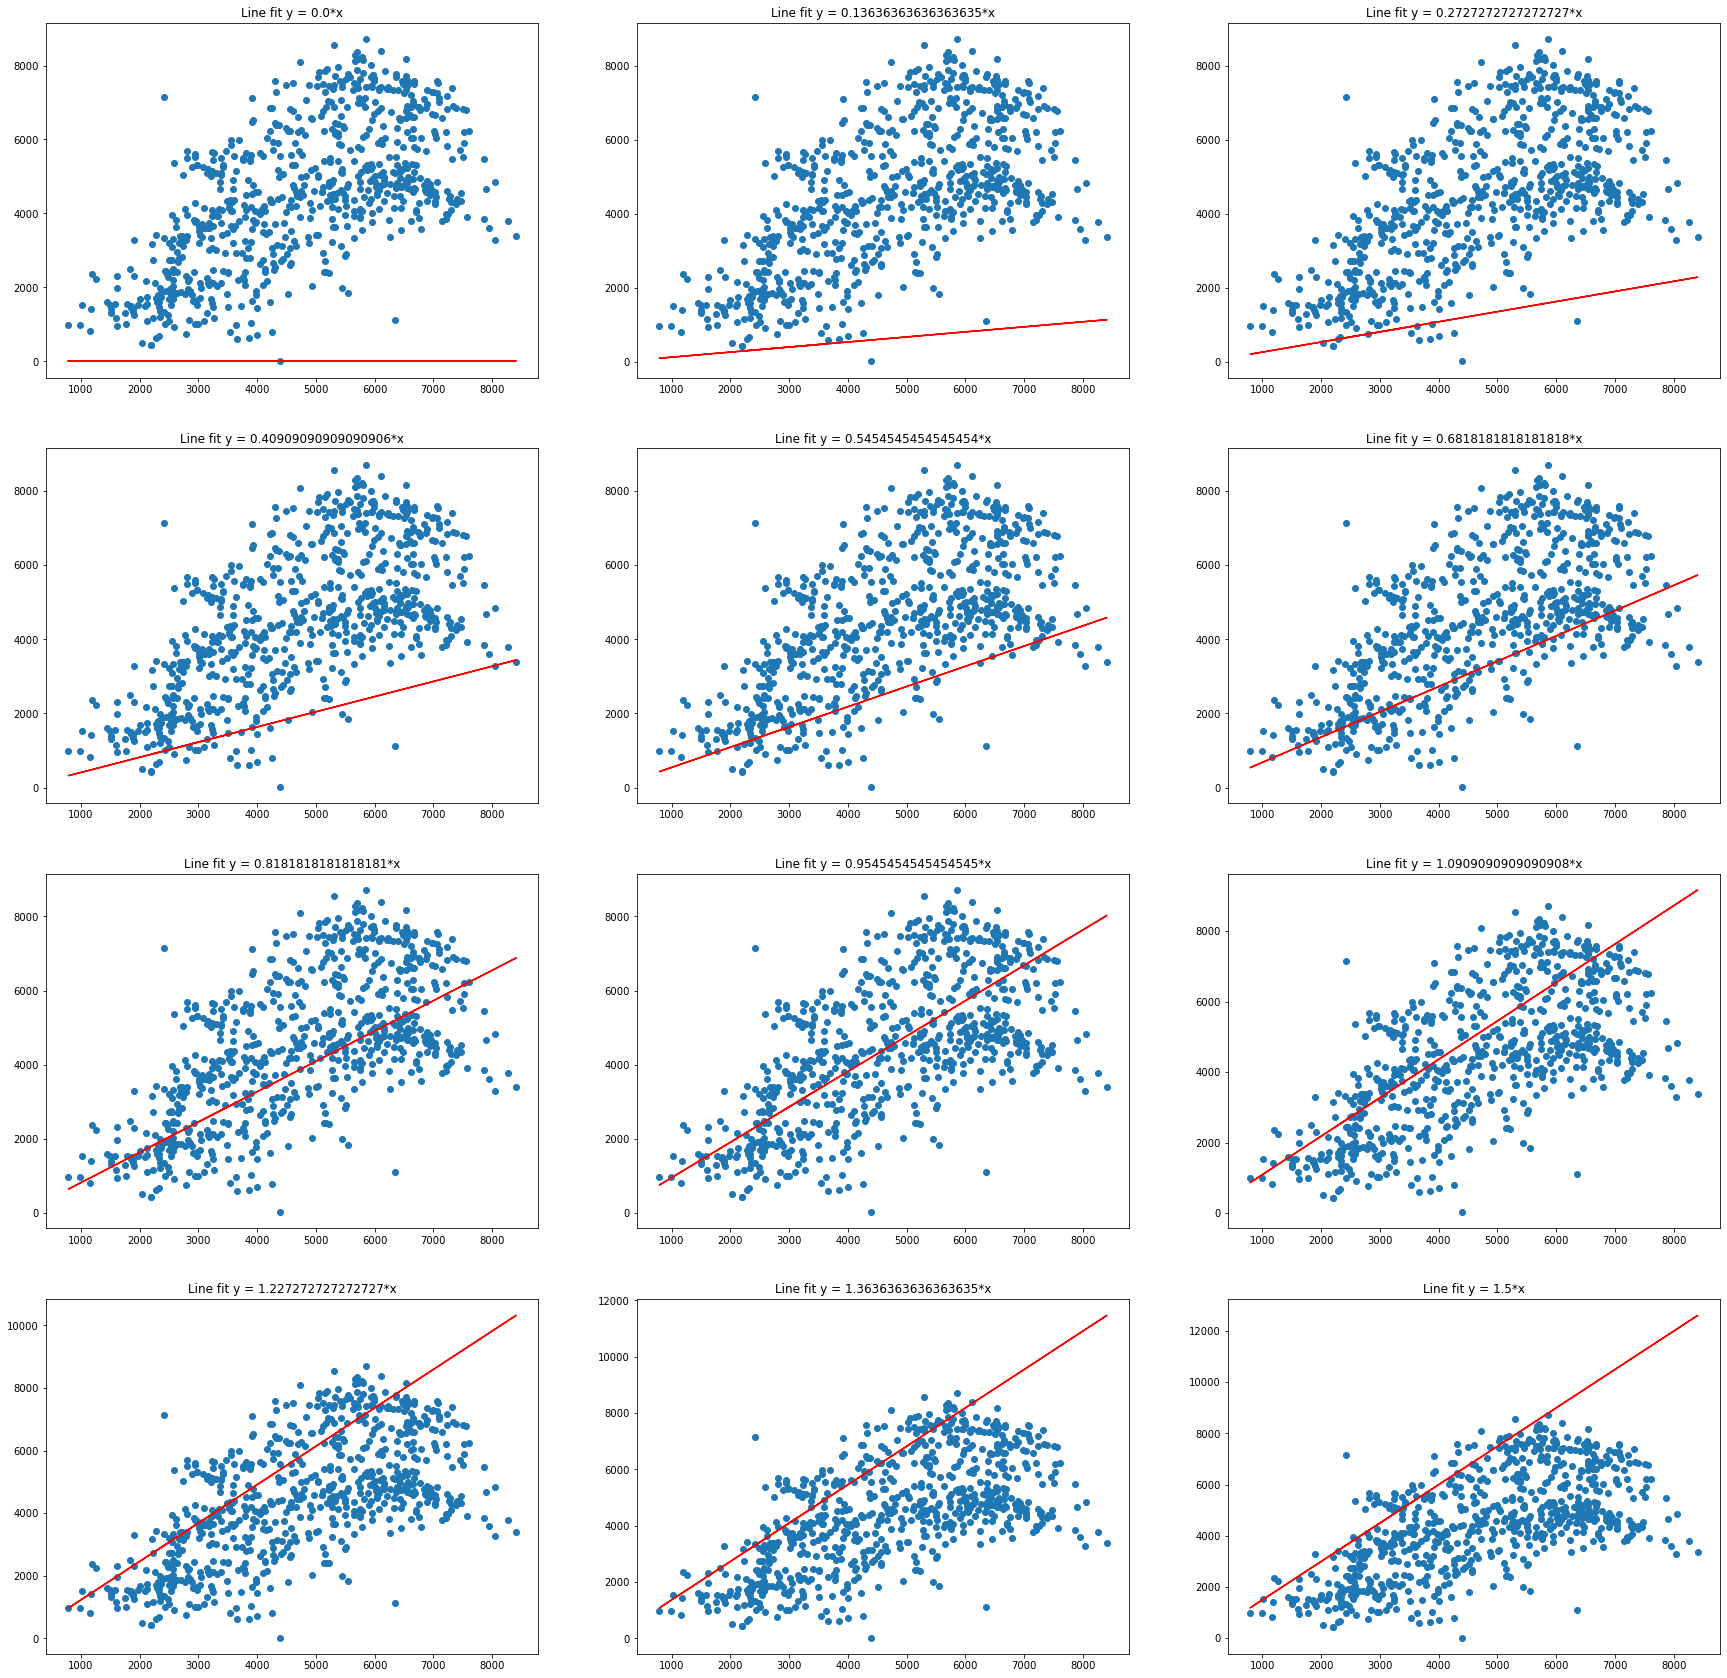

In [6]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import time
range_m = np.linspace(0,1.5,12)
plt_sec = 0
plt.rcParams["figure.figsize"] = (30, 30)
for m in range_m:
    plt_sec += 1
    y_fit = m * df['atemp']
    plt.subplot(4, 3, plt_sec)
    plt.plot(df['atemp'], y_fit, color = 'r')
    plt.scatter(df['atemp'], df['cnt'])
    plt.title(f"Line fit y = {m}*x")
    plt.draw()
    
    

In [7]:
import numpy as np

range_m = np.linspace(-1,3,50)
error_plot = []
m_plot = []
for m in range_m:
    y_fit = m * df['atemp']
    error = df['cnt'] - y_fit
    error_sq = error ** 2
    error_sqrt = error ** (1/2)
    error_sum = error_sqrt.sum()
    error_avg = error_sq.sum()/(len(error_sq))
    error_plot.append(error_avg)
    m_plot.append(m)

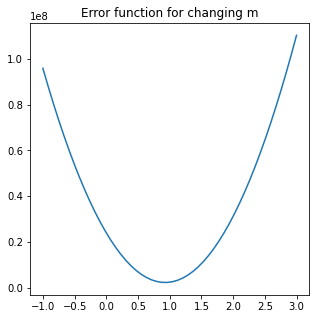

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(m_plot, error_plot)
plt.title(f"Error function for changing m")
plt.draw()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import time

range_c = np.linspace(-1500,1500,50)
error_plot = []
c_plot = []
for c in range_c:
    y_fit = df['atemp'] + c
    error = df['cnt'] - y_fit
    error_sq = error ** 2
    error_sqrt = error ** (1/2)
    error_sum = error_sqrt.sum()
    error_avg = error_sq.sum()/(len(error_sq))
    error_plot.append(error_avg)
    c_plot.append(c)

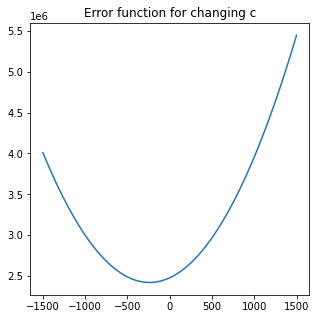

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(c_plot, error_plot)
plt.title(f"Error function for changing c")
plt.draw()

Text(0.5, 0.92, 'Error function for changing m and c')

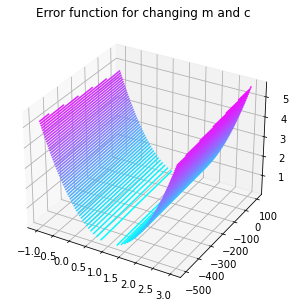

In [11]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import time

def error(m, c):
    y_fit = m * df['atemp'] + c
    error = df['cnt'] - y_fit
    error_sq = error ** 2
    error_sum = error_sq.sum()
    error_avg = error_sq.sum()/(2*len(error_sq))
    return error_avg

range_m = np.linspace(-1,3,50)
range_c = np.linspace(-500,100,50)
M, C = np.meshgrid(range_m, range_c)

Z = []
for c in range_c:
    t = []
    for m in range_m:
        t.append(error(m,c))
    Z.append(t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(M, C, Z, 60, cmap=cm.cool)
plt.title(f"Error function for changing m and c")


## Single variant linear regression

In [12]:
import os
import pandas as pd
nb_full_path = os.path.join(os.getcwd(), 'Day-9.ipynb')
df=pd.read_csv(os.path.join(os.path.dirname(nb_full_path) + '/data/day.csv'), sep=',',header=0)
df.head()


X = df[['atemp']].values
Y = df.iloc[:, 14].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 20, random_state = 0)

#import linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train )
print(reg.score(X_test, y_test))
print(reg.coef_)
print(reg.intercept_)

0.24604193200234448
[5172.36184508]
1216.438972945884


## Multi variant linear regression

In [20]:
import os
import pandas as pd
nb_full_path = os.path.join(os.getcwd(), 'Day-9.ipynb')
df=pd.read_csv(os.path.join(os.path.dirname(nb_full_path) + '/data/day.csv'), sep=',',header=0)
df.head()

df = df.drop(['instant','dteday'], axis = 1)
X = df.iloc[:, :11].values
Y = df.iloc[:, 12].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 20, random_state = 0)

#import linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train )
print(reg.score(X_test, y_test))
print(reg.coef_)
print(reg.intercept_)

0.898712194108248
[  452.95312784  1744.80356545   -24.40030264  -242.28405273
    44.42602353   953.49137982  -492.74476534   880.56764328
  2606.89660562  -601.48214831 -1693.97609467]
751.6011871228061


## Important links
- https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/
- https://www.youtube.com/watch?v=sDv4f4s2SB8&t=522s
- https://www.coursera.org/learn/machine-learning/supplement/U90DX/gradient-descent-for-linear-regression